# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

# Load Data

In [2]:
data = pd.read_csv('iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


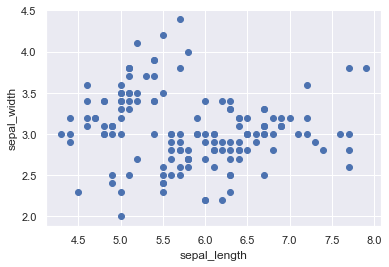

In [3]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# Clustering

In [4]:
x = data.copy()

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [6]:
clusters = data.copy()
clusters['Cluster_pred'] = kmeans.fit_predict(x)

In [7]:
clusters

,sepal_length,sepal_width,petal_length,petal_width,Cluster_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Plotting Data

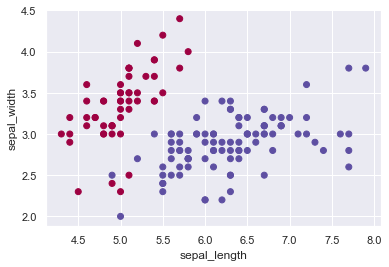

In [8]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c=clusters['Cluster_pred'], cmap='Spectral')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# Standardize

In [22]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(data)

x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [23]:
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [24]:
clusters_scaled = data.copy()
clusters_scaled['Cluster_pred'] = kmeans_scaled.fit_predict(x_scaled)

In [25]:
clusters_scaled

,sepal_length,sepal_width,petal_length,petal_width,Cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


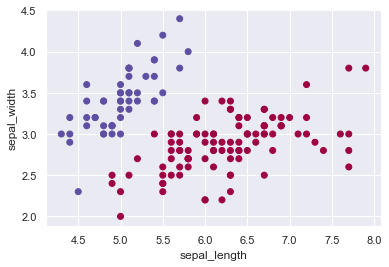

In [26]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c=clusters_scaled['Cluster_pred'], cmap='Spectral')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# The Elbow Method 

# WCSS

In [27]:
wcss=[]
num=10
for i in range(1,num):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.6446141558917,
 91.1543680779766,
 80.53520939466797,
 72.26618444680803,
 62.66035232447273,
 55.68430903151081]

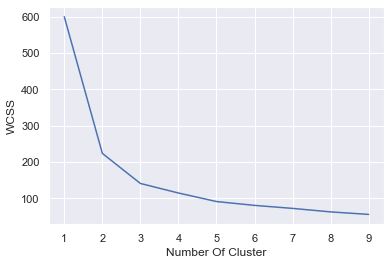

In [28]:
no_of_cluster = range(1,num)
plt.plot(no_of_cluster,wcss)
plt.xlabel('Number Of Cluster')
plt.ylabel('WCSS')
plt.show()

We can see the last change in above curve is at no_of_clusters=5, so we can build upto 5 clusters.

But at 4 we see no diffence in curve.

So we can take no_of_cluster = 2,3,5 in KMeans().

# Clustering


# For Cluster-2

In [47]:
kmeans = KMeans(2)
kmeans.fit(x_scaled)

KMeans(n_clusters=2)

In [48]:
clusters_2 = x.copy()
clusters_2['Cluster_pred'] = kmeans.fit_predict(x_scaled)
clusters_2

,sepal_length,sepal_width,petal_length,petal_width,Cluster_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


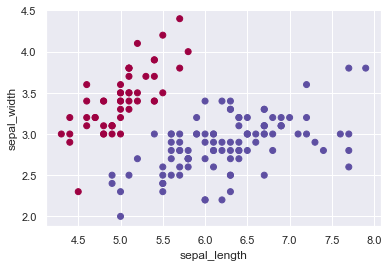

In [49]:
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c=clusters_2['Cluster_pred'], cmap='Spectral')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# For Cluster-3

In [50]:
kmeans = KMeans(3)
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [51]:
clusters_3 = x.copy()
clusters_3['Cluster_pred'] = kmeans.fit_predict(x_scaled)
clusters_3

,sepal_length,sepal_width,petal_length,petal_width,Cluster_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


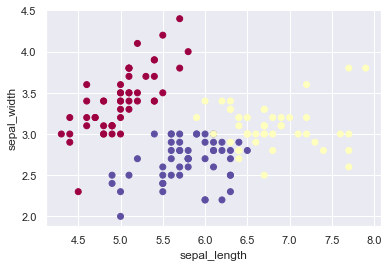

In [52]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c=clusters_3['Cluster_pred'], cmap='Spectral')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# For Cluster-5

In [53]:
kmeans = KMeans(5)
kmeans.fit(x_scaled)

KMeans(n_clusters=5)

In [54]:
clusters_5 = x.copy()
clusters_5['Cluster_pred'] = kmeans.fit_predict(x_scaled)
clusters_5

,sepal_length,sepal_width,petal_length,petal_width,Cluster_pred
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,3
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,4
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,0


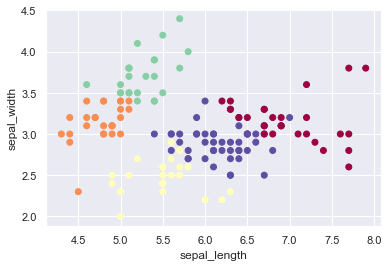

In [55]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c=clusters_5['Cluster_pred'], cmap='Spectral')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# Comparison with real data

Loading Real Data

In [56]:
real_data = pd.read_csv('iris-with-answers.csv')
real_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
real_data['species'] = real_data['species'].map({'setosa':0,'versicolor':1 , 'virginica':2})

In [58]:
real_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Real-Data

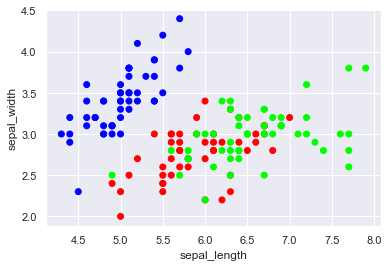

In [64]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c=real_data['species'], cmap='brg')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

Since there are 3 clusters so we will compare it with our KMeans(3) solution plot.

# Our Solution

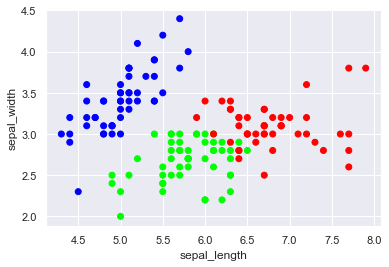

In [65]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c=clusters_3['Cluster_pred'], cmap='brg')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# Conclusion

In fact, if you read about it, the original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3.

This shows us that:
<li> the Eblow method is imperfect (we might have opted for 2 or even 4) </li>
<li> k-means is very useful in moments where we already know the number of clusters - in this case: 3 </li>
<li> biology cannot be always quantified (or better).. quantified with k-means! Other methods are much better at that </li>

Finally, you can try to classify them (instead of cluster them, now that you have all the data)! 